# Titanic_train.csv 파일을 data라는 변수에 불러오고, PassengerId를 index로 지정을 하시오!!!
필요한 패키지는 numpy / pandas / matplolib.pyplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r".\data\titanic_train.csv"
data = pd.read_csv(path, index_col="PassengerId")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 수치형 컬럼만 summary해준다.
# 대략적으로 움직이는 범위 ---> ML : 컬럼들에 대해서 조정
# 정규화
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 데이터들에서 NaN이 없는 지 확인한다.

In [4]:
# 모델을 돌리기 위해서는 무조건 반드시 Nan이 없어야 한다.
# 타입이 숫자형인지 아닌지 체크한다.  --->  모델은 숫자형으로 돌려야 한다
# 인코딩  라벨인코딩/원핫인코딩
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- 항목별로 이상한 데이터들의 비율을 계산하시오!!!

In [5]:
# 빵구난데이터인지 --> 수행은 컬럼단위로 수행!!!!
col = "Age"
len(data[data["Age"].isnull()]) / len(data)

0.19865319865319866

In [6]:
# 전체 컬럼에 돌려가면서 보니  --> 컬럼 리스트
for col in data.columns:
    print(col,":",str(len(data[data[col].isnull()]) / len(data)))

Survived : 0.0
Pclass : 0.0
Name : 0.0
Sex : 0.0
Age : 0.19865319865319866
SibSp : 0.0
Parch : 0.0
Ticket : 0.0
Fare : 0.0
Cabin : 0.7710437710437711
Embarked : 0.002244668911335578


In [7]:
for col in data.columns:
    print(col,":",str(len(data[data[col].notnull()]) / len(data)))

Survived : 1.0
Pclass : 1.0
Name : 1.0
Sex : 1.0
Age : 0.8013468013468014
SibSp : 1.0
Parch : 1.0
Ticket : 1.0
Fare : 1.0
Cabin : 0.22895622895622897
Embarked : 0.9977553310886644


### 참고 : 데이터 항목 설명[ surveved : 생존여부(0/1), Pclass : 티켓의 클래스(1은 1st, 2는 2nd ..), name : 승객이름, sex : 승객성별, Age : 승객나이, SibSp : 함께 탑승한 형재와 배우자의 수, parch : 함께 탑승한 부모, 아이의 수, ticket: 티켓번호, Fare: 탑승료, cabin : 객실번호, embarked :탑승항구(C:Cherboug, Q :Queenstown, S:south ampton)]

- 탑승항구가 Cherboug 이면서, 탑승료를 200 초과로 지불한 사람들에 대한 데이터를 추리고, head로 앞에 불러서 확인!

In [8]:
# 전체 데이터 중에서 Embarked값이 C 이면서, Fare 200초과인 것들만 데이터를 추리
# ---> 조건 검색 --> 불리언 인덱싱!!!!
data[ (data["Embarked"]=="C") & (data["Fare"]>200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


- 위의 조건에(항구/요금) 해당하는 것들을 요금에 대한 기준으로 정리를 하세요(요금이 높은 사람부터 낮은 사람 순서대로.)

In [9]:
# DF에서 정렬에 대해서 이름, 값 -> sort_index, sort_vlaues
data[ (data["Embarked"]=="C") & (data["Fare"]>200)].sort_values(by="Fare", ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C


- 나이에 대항 카테고리를 정리하는 함수를 만들고(기준은 30미만은 1, 30이상~55미만은 2, 그 이상은 3으로 코딩)하는 함수 만들기.

In [10]:
# 정말로 자주 사용이 되는 부분!!! --> 기존을 값을 내 기준으로 변경!!!!
# 분석, EDA 만이 아니라 ML에서 Feauture를 어떻게 바꿀지,,시도할지...
# apply, lambda // 일반적인 함수로 만들어서!!!!!

In [11]:
# Age 컬럼의 값을 30미만:1, 30~55 :2, 55~ : 3
# 1) lambda 함수 if문을 같이 활용을 하는 경우!!!!! 
#    2분법적으로 바로봅니다..
lambda x : 조건만족할때 값 if 조건 else else일때값
lambda x : 조건1만족값 if 조건1 else ( 조건2만족값 if 조건2 else (~~~~~~))

SyntaxError: invalid syntax (560280874.py, line 4)

In [13]:
data["Age"].apply(lambda x : 1 if x<30 else (2 if x<50 else 3))

PassengerId
1      1
2      2
3      1
4      2
5      2
      ..
887    1
888    1
889    3
890    1
891    2
Name: Age, Length: 891, dtype: int64

In [14]:
def age_category(age):
    if age <30:
        return 1
    elif age <55:
        return 2
    else:
        return 3

- 위의 나이를 분류하는 함수를 바탕으로 Age_catogory하는 컬럼을 만들어서 생성하시오!!!

In [15]:
data['Age'].apply(lambda x : age_category(x))

PassengerId
1      1
2      2
3      1
4      2
5      2
      ..
887    1
888    1
889    3
890    1
891    2
Name: Age, Length: 891, dtype: int64

In [16]:
# apply 내가 처리할 함수명으로...
data["Age"].apply(age_category)

PassengerId
1      1
2      2
3      1
4      2
5      2
      ..
887    1
888    1
889    3
890    1
891    2
Name: Age, Length: 891, dtype: int64

In [17]:
# 리스트 컴프리핸션...
age_cat = [ age_category(age) for age in data.Age ]
data["Age_new"] = age_cat
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [18]:
data["Age_new"].value_counts()

1    384
2    288
3    219
Name: Age_new, dtype: int64

- 성별이 남성, 성별이 여성인 사람들의 각각 전체 수는?

In [19]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
type(data["Sex"].value_counts())

pandas.core.series.Series

In [21]:
data["Sex"].value_counts()[0]

577

- 성별에 대해서 남성/여성이 어떻게 분포하는지 확인

<AxesSubplot:title={'center':'F/'}>

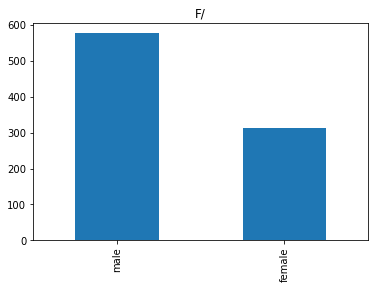

In [22]:
data["Sex"].value_counts().plot(kind="bar",title="F/")

<AxesSubplot:title={'center':'M/F Counts'}>

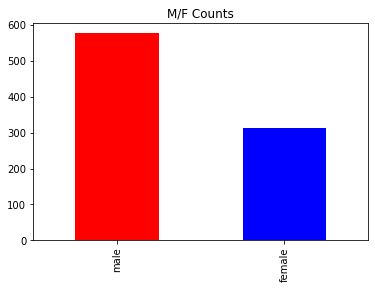

In [23]:
data["Sex"].value_counts().plot(kind="bar",
                                title="M/F Counts",
                                color=["r","b"])

<AxesSubplot:title={'center':'M/F Counts'}>

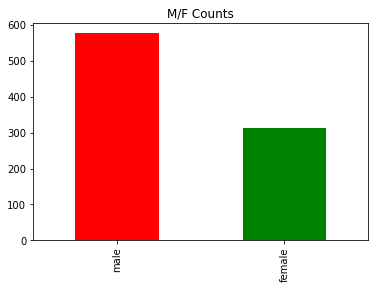

In [24]:
c_dict = {"male":"r",
         "female":"g"}
data["Sex"].value_counts().plot(kind="bar",
                                title="M/F Counts",
                                color=data["Sex"].replace(c_dict))

In [25]:
data["Sex"].replace(c_dict)

PassengerId
1      r
2      g
3      g
4      g
5      r
      ..
887    r
888    g
889    g
890    r
891    r
Name: Sex, Length: 891, dtype: object

- 선실 등급 별로 성별이 어떻게 분포하는지 확인

In [26]:
# 원본 데이터에서 내가 보고자 하는 것이 
# 객식 등급별로 남성/여성의 비율이 어떤가?`
pd.pivot_table(data,
               index=["Pclass"], 
               values=["Fare"],
               columns=["Sex"],
               aggfunc=[len],margins=True
              )

len          
         Fare          
Sex    female male  All
Pclass                 
1          94  122  216
2          76  108  184
3         144  347  491
All       314  577  891

In [27]:
pd.pivot_table(data, 
               index=["Pclass"],
               values=["Fare"],
               columns=["Sex"],
               aggfunc="count", margins=True
               )

Fare          
Sex    female male  All
Pclass                 
1          94  122  216
2          76  108  184
3         144  347  491
All       314  577  891

- crosstab 에서도 아래와 같이 꾸밀 수 있음!!

In [30]:
# 통계 프로그램들에서 자주 활용이 되는 카운트 기반의 테이블 crosstab
pd.crosstab(data['Pclass'], data['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [31]:
pd.crosstab(data["Pclass"], data["Sex"]).style.background_gradient(cmap="PuBu")

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [32]:
pd.crosstab(data["Pclass"], data["Sex"]).style.background_gradient(cmap="summer_r")

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


- 아래 그림과 같이 Pclass에 대한 히스토그램을 그리는데, 남자/여자/전체에 대해서 나타날 수 있도록 그리시오.

<AxesSubplot:>

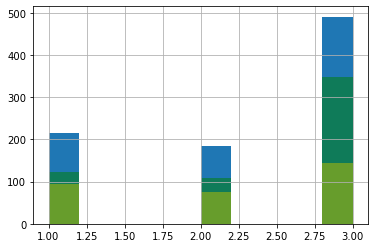

In [43]:
# 전체 Pclass에 대해서 그릴려고 해서 데이터 추리고, 그래프
data["Pclass"].hist(label="all")
# 남성에 대해서만 추려서 그릴려면... 데이터를 추려 --> 불리언인덱싱
data[data["Sex"] =="male"]["Pclass"].hist(color='g', label = "male", alpha=.5)
# 여성에 대해서만 추려서 그릴려면.. 데이터 추리고.. 그래프
data[data["Sex"] =="female"]["Pclass"].hist(color='y', label = "female", alpha=.5)

- 요금(fare)에 대한 평균/ 중앙값(median)/표준편차를 구해보시오.

In [45]:
round(12345.67891234,3)

12345.679

In [46]:
# 요금에 대한 중앙값, 평균값을 소수점 2자리까지....
# ---> ML 빠진값을 처리할 때,,, 채울려고 할 떄 : 평균, 최빈, 중앙, etc
round(data["Fare"].median(), 2)

14.45

In [47]:
round(data["Fare"].mean(), 2)

32.2

- 아래 그래프와 같이 생존 여부에 대한 나이별로 그래프를 나타내보시오!

<AxesSubplot:>

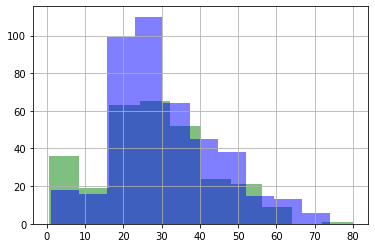

In [53]:
# 간단하게 대략적인 분포를 보기 위새헛 ---> 나이대별로 생존여부
# --> 모델에서는 모델의 결과변수, 설명변수 관계
# 2개의 그래프를 겹쳐서 그리는 부분 ---> 필요한 데이터를 추출 & 그래프
# 생존한 사람 & 나이의 정보만
data[data["Survived"]==1]["Age"].hist(color="g", label="Survived", alpha=.5)
# 사망한 사람 & 나이의 정보만
data[data["Survived"]==0]["Age"].hist(color="b", label="Died", alpha=.5)

- seaborn 패키지를 로드하세요.

In [54]:
import seaborn as sns

In [55]:
# seabron 패키지를 활용하는 기본 방법
# 가로, 세로, 구별해서 보겠다 hue(pivot : columns )
# 사용스타일 1) 가로, 세로를 직접 데이터를 미는 방식
# 사용스타일 2) 어느 DF에서, 가로는 뭔 컬럼, 세로는 뭔 컬럼 : 컬럼이름만

- 아래 그림과 같이 생존 여부에 대한 나이별로 boxplot를 그려보세요.

<AxesSubplot:xlabel='Survived', ylabel='Age'>

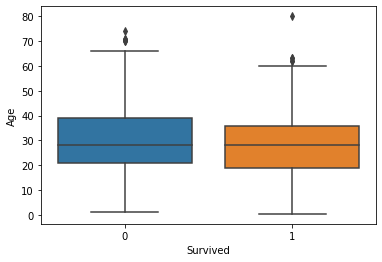

In [56]:
# 1번 스타일로 --> 직접 가로/ 세로에 데이터를 밀어 넣는 방식
sns.boxplot(x=data["Survived"], y = data["Age"])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

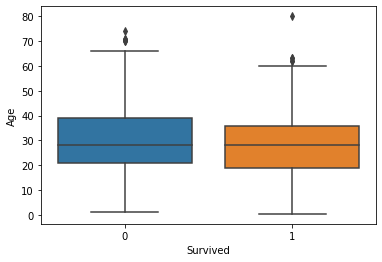

In [57]:
# 2번 스타일 : 컬럼 이름 중심으로
sns.boxplot(data = data, x="Survived", y = "Age")

- 생존자한 사람들의 나이 평균, 생존하지 못한 사람들의 나이 평균을 구하세요.

In [58]:
# m1) 불리언 인덱싱을 통한 종류별 값 처리
print(data[data["Survived"]==0]["Age"].mean())
print(data[data["Survived"]==1]["Age"].mean())

30.62617924528302
28.343689655172415


In [59]:
data.groupby(by=["Survived"])

In [60]:
# head는 원래 5개만 출력인데 10개가 나오는 이유는 survived가 0,1 두가지 경우이기 때문
data.groupby(by=["Survived"]).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,3
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,2
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1


In [64]:
# 묶어서 종류별로 볼 때 : groupby
data.groupby(by=["Survived"])["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

- 위의 결과들을 보고, 본인만의 기준을 가지고 (젊은 생존자의 구분 : 예 30, 나이든 생존자의 구분: 예60)이런 식으로 구분을 하고, 각기 전체에서 얼마나 차지하는지 비율을 계산해보세요..

In [67]:
# 30세 이하 젊은 생존자 비율
y_s = data.loc[data["Age"]<30, "Survived"]
# 60세 이상 고령 생존자 비율
o_s = data.loc[data["Age"]>60, "Survived"]

In [68]:
print("젊은 생존자의 비율 : ", round(y_s.mean()*100, 2))
print("고령 생존자의 비율 : ", round(o_s.mean()*100, 2))

젊은 생존자의 비율 :  40.62
고령 생존자의 비율 :  22.73


- 남성 중에서 생존자들과, 여성 중에서 생존자들에 대한 것을 가지고 각기 평균 비율을 구하시오.

In [72]:
# 남성 중에서 생존자 비율
m_s = data.loc[data["Sex"]=="male", "Survived"]
# 여성 중에서 생존자 비율
f_s = data.loc[data["Sex"]=="female", "Survived"]

In [73]:
print("남성 생존자의 비율 : ", round(m_s.mean()*100, 2))
print("여성 생존자의 비율 : ", round(f_s.mean()*100, 2))

남성 생존자의 비율 :  18.89
여성 생존자의 비율 :  74.2


- 이름 컬럼에 대한 head()를 보이세요.

In [75]:
data["Name"]
# 참고) 영문 이름들에 대한 추출 정규식보다는 이름을 추출하는 모델!!!
# 기존에 학습된 이름 추출 모델

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

- 1번 사람의 이름을 , 를 구분하여 분리해서,. first name만 나타내보세요.

In [76]:
# 분석용이 아니라 데이터 처리 연습으로 문자열 처리
data.loc[1, "Name"].split(",")[0]

'Braund'

- first_names 라는 변수를 만들어서 성별이 남자인 사람들의 firstname을 구하고, 각기 firstname별로 얼마나 많이 나타나는지 확인하세요.

In [77]:
first_name = data.loc[data["Sex"]=='male', "Name"].apply(lambda x : x.split(",")[0])
first_name

PassengerId
1        Braund
5         Allen
6         Moran
7      McCarthy
8       Palsson
         ...   
884    Banfield
885    Sutehall
887    Montvila
890        Behr
891      Dooley
Name: Name, Length: 577, dtype: object

In [79]:
first_name.value_counts().head()

Panula        5
Sage          4
Gustafsson    4
Rice          4
Williams      4
Name: Name, dtype: int64

- 각 등급별로 남성/여성의 평균 나이를 계산해서 나타내시오..

- 등급별로 성별에 대한 나이 평균을 표로 만드세요.

In [80]:
# pivot_table FM : crosstab으로 구현!!!!
pd.crosstab(data["Pclass"], data["Sex"], 
    values=data["Age"], aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


- 위의 그래프는 boxplot으로 나타내시오

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

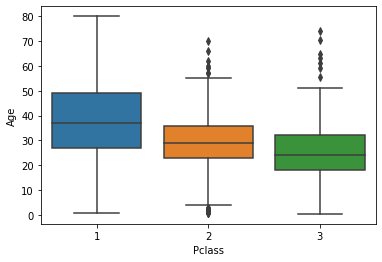

In [81]:
sns.boxplot(data=data, x="Pclass",y="Age")

- 정보를 보면 cabin에 대해서는 정보가 많이 부족하기에, 이 항목은 제거.

In [82]:
# EDA를 할 때는 불필요한 컬럼은 큰 문제가 안 됨
# 모델을 돌릴 때에는 꼭 제거를 해야 합니다 scikit-learn은 DF를 입력

# pandas에서 지우는 거 : drop (가로/세로)
# 참고) dropna: 절값에 대한 처리(가로/세로, 몇 개 기준으로..)
data.drop("Cabin", axis=1).dropna()
data # 자체적으로 변경사항을 처리할 때 ,,, inplace=True

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  Age_new   891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB
